# Introduction

This practice comes from [2023 Week 20: Can you build a heat map with bathymetry lines?](https://workout-wednesday.com/2023w20tab/), which creates a heatmap with bathymetry lines. It's an interesting chart, because I've never seen a heat map with some contour lines.

In [1]:
import pandas as pd

In [2]:
file_path = '../data/Sample - Superstore 2019.4.csv'

In [16]:
data = pd.read_csv(file_path, parse_dates=[7, 17])
data['Sales_Num'] = data['Sales'].str.replace(r'\$|,', '', regex=True).astype('float')

In [31]:
data_groupby_month = data.groupby(['Sub-Category', data['Order Date'].dt.month]).sum(numeric_only=True).reset_index()
data_groupby_month

,Sub-Category,Order Date,Number of Records,Postal Code,Quantity,Sales_Num
0,Accessories,1,30,1704721.0,111,5479.0
1,Accessories,2,25,1625579.0,83,5370.0
2,Accessories,3,52,2722797.0,183,8767.0
3,Accessories,4,47,2780748.0,171,7952.0
4,Accessories,5,52,3226637.0,195,9615.0
...,...,...,...,...,...,...
198,Tables,8,28,1529759.0,111,16888.0
199,Tables,9,34,2070521.0,116,19626.0
200,Tables,10,39,2130499.0,129,20222.0
201,Tables,11,43,2513966.0,200,33182.0


In [32]:
data_sales_pivot = data_groupby_month.pivot(index='Sub-Category', columns='Order Date', values='Sales_Num')
data_sales_pivot

Order Date,1,2,3,4,5,6,7,8,9,10,11,12
Sub-Category,,,,,,,,,,,,
Accessories,5479.0,5370.0,8767.0,7952.0,9615.0,8909.0,17129.0,12378.0,24903.0,12928.0,25963.0,28008.0
Appliances,3175.0,4934.0,6735.0,6043.0,7526.0,7479.0,3824.0,13063.0,10194.0,9153.0,18971.0,16441.0
Art,916.0,1117.0,1302.0,2411.0,2234.0,2218.0,2067.0,1694.0,3662.0,1921.0,3959.0,3636.0
Binders,12217.0,4236.0,13892.0,13363.0,9162.0,13292.0,8555.0,20433.0,37355.0,18076.0,20852.0,31995.0
Bookcases,5352.0,1650.0,7350.0,4719.0,6290.0,9150.0,8588.0,5620.0,23374.0,8247.0,23562.0,10977.0
Chairs,11286.0,7585.0,21345.0,18527.0,25895.0,21523.0,23014.0,18340.0,51580.0,24168.0,47759.0,57432.0
Copiers,3960.0,NaN,25590.0,3880.0,18400.0,900.0,9780.0,5730.0,10320.0,37020.0,15150.0,18800.0
Envelopes,749.0,670.0,1656.0,945.0,1096.0,514.0,1200.0,701.0,2175.0,1405.0,2907.0,2459.0
Fasteners,89.0,157.0,150.0,259.0,109.0,115.0,181.0,243.0,405.0,326.0,550.0,440.0


In [43]:
data_sales_pct = data_sales_pivot.truediv(data_sales_pivot.sum(axis=1), axis=0).fillna(0).cumsum(axis=1)
data_sales_pct

Order Date,1,2,3,4,5,6,7,8,9,10,11,12
Sub-Category,,,,,,,,,,,,
Accessories,0.032730,0.064808,0.117180,0.164682,0.222119,0.275339,0.377662,0.451604,0.600367,0.677595,0.832689,1.0
Appliances,0.029524,0.075406,0.138035,0.194229,0.264214,0.333761,0.369321,0.490794,0.585588,0.670702,0.847115,1.0
Art,0.033755,0.074916,0.122895,0.211740,0.294063,0.375797,0.451966,0.514390,0.649335,0.720124,0.866013,1.0
Binders,0.060056,0.080879,0.149168,0.214857,0.259895,0.325235,0.367290,0.467733,0.651361,0.740218,0.842721,1.0
Bookcases,0.046588,0.060951,0.124931,0.166009,0.220763,0.300412,0.375169,0.424090,0.627556,0.699345,0.904447,1.0
Chairs,0.034361,0.057454,0.122440,0.178847,0.257686,0.323214,0.393282,0.449119,0.606158,0.679739,0.825144,1.0
Copiers,0.026483,0.026483,0.197619,0.223567,0.346619,0.352638,0.418043,0.456363,0.525380,0.772955,0.874273,1.0
Envelopes,0.045457,0.086120,0.186624,0.243976,0.310493,0.341688,0.414517,0.457061,0.589064,0.674334,0.850762,1.0
Fasteners,0.029431,0.081349,0.130952,0.216601,0.252646,0.290675,0.350529,0.430886,0.564815,0.672619,0.854497,1.0


In [55]:
data_sales_contour = (data_sales_pct * 50).round(-1)
data_sales_contour

Order Date,1,2,3,4,5,6,7,8,9,10,11,12
Sub-Category,,,,,,,,,,,,
Accessories,0.0,0.0,10.0,10.0,10.0,10.0,20.0,20.0,30.0,30.0,40.0,50.0
Appliances,0.0,0.0,10.0,10.0,10.0,20.0,20.0,20.0,30.0,30.0,40.0,50.0
Art,0.0,0.0,10.0,10.0,10.0,20.0,20.0,30.0,30.0,40.0,40.0,50.0
Binders,0.0,0.0,10.0,10.0,10.0,20.0,20.0,20.0,30.0,40.0,40.0,50.0
Bookcases,0.0,0.0,10.0,10.0,10.0,20.0,20.0,20.0,30.0,30.0,50.0,50.0
Chairs,0.0,0.0,10.0,10.0,10.0,20.0,20.0,20.0,30.0,30.0,40.0,50.0
Copiers,0.0,0.0,10.0,10.0,20.0,20.0,20.0,20.0,30.0,40.0,40.0,50.0
Envelopes,0.0,0.0,10.0,10.0,20.0,20.0,20.0,20.0,30.0,30.0,40.0,50.0
Fasteners,0.0,0.0,10.0,10.0,10.0,10.0,20.0,20.0,30.0,30.0,40.0,50.0


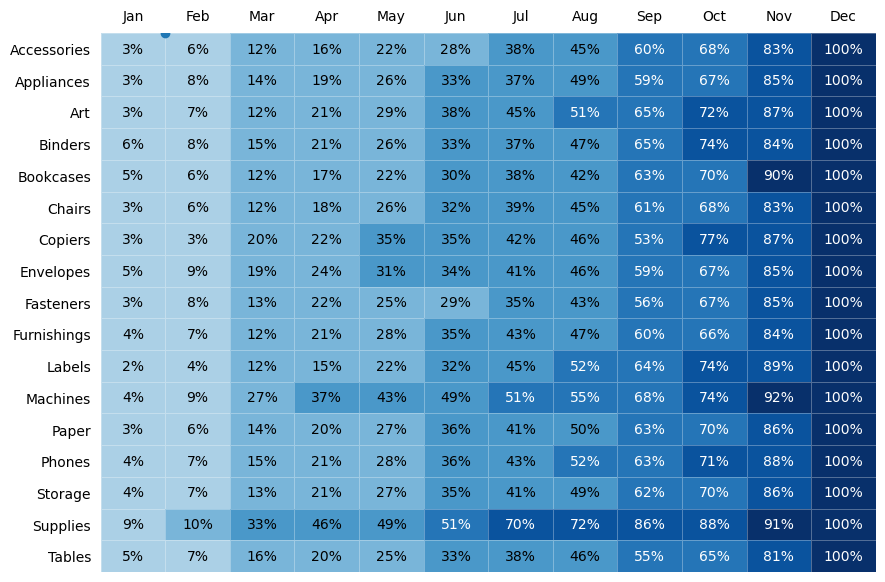

In [115]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))

qmesh = ax.pcolormesh(data_sales_contour.columns, data_sales_contour.index, data_sales_contour,
              cmap='Blues', linewidth=0.5, edgecolors=(1.,1.,1.,0.3),
              vmin=-25)

ax.scatter([1.5], [-0.5])

for x in data_sales_pct.columns:
    for y in range(0, data_sales_pct.shape[0]):
        pct = data_sales_pct.iloc[y, x-1]
        color = 'white' if pct >= 0.5 else 'black'
        ax.text(x, y, f'{pct:.0%}', ha='center', va='center', color=color)

ax.tick_params(labeltop=True, labelbottom=False, left=False, bottom=False)
ax.xaxis.set_ticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.invert_yaxis()
ax.spines[:].set_visible(False)

In [114]:
# xmax, ymax = data_sales_contour.shape

# for i in range(xmax):
#     for j in range(ymax):
qmesh.get_coordinates()[0,1]        

array([ 1.5, -0.5])

In [110]:
data_sales_contour.shape

(17, 12)